## Ex 4.10

### Part 1
##### - a) Importing Libraries
##### - b) Importing Pickle
##### - c) Performing Data checks on imported files
##### - d) Addressing PPI concerns
### Part 2
##### - a) Creating a region variable
##### - b) Confirming regional spend type differences
##### - c) Creating an exclusion flag for clients with low order frequency
### Part 3
##### - a) Creating customer (Cx) profiles based on Age-Income as well as Family Details -Incomes
##### - b) Showcase Cx profile distribution using visualizations
##### - c) Overview of aggregtation statistics for order_frequency and order_totals (expenditure) for each Cx profile
### Part 4
##### - a) Cx profile comparisions: Region, Deapartment
##### - b) Comparison Visualizations

#### Part 1. a) - Importing libraries and data sets

In [1]:
#Importing Libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project\02 Data'

#### b) Importing Pickle & CSV

In [3]:
ords_prods_custs = pd.read_pickle(os.path.join(path,'Prepared Data','ords_prods_custs_with_departments.pkl'))

#### c) Performing Data checks on imported files

In [4]:
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,department
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
1,2398795,1,prior,2,3,7,15.0,Repeat Customer,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
2,473747,1,prior,3,3,12,21.0,Repeat Customer,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
3,2254736,1,prior,4,4,7,29.0,Repeat Customer,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
4,431534,1,prior,5,4,15,28.0,Repeat Customer,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages


#### An additional action to clean up prices needs to take place - 2% milk products are showing up as 999999 prices and are skewing price related calculations. In order to clean these values I have decided to impute the mean product price related from a subset of the data that DOES NOT contain the outlier values. Actions completed in 5 steps - Describe() the regular 'prices' column. Subset the 'good' data and calculate the mean (highest value is typically 25, but as an additional precaution, I'll do anything under 500, as we know the outlier values are 14500 and 99999. lastly, use .loc to then repace the outliers with the mean value

In [5]:
ords_prods_custs['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
ords_no_outliers = ords_prods_custs[ords_prods_custs['prices']<=1000]

In [7]:
ords_no_outliers['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [8]:
ords_prods_custs.loc[ords_prods_custs['prices'] >= 500, 'prices'] = 7.79

In [9]:
ords_prods_custs['prices'].describe()

count    3.240486e+07
mean     7.790994e+00
std      4.241474e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

#### d) Addressing PPI concerns - Due to the customer data added onto the right side of the file, the data contains personal information which can be linked to a specific individual (though in this case, the data is fabricated). This PII would need to be brought to manager/senior colleagues attention so that it can be dealt with in acordance with company and legal regulations prior to being stored/distributed.

#### In this instance, since there is no superior, I've decided to remove the name columns so that the user is able to remain anonymous

In [10]:
ords_prods_custs.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'cx_spend_type', 'order_frequency', 'cx_order_frequency',
       'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'department'],
      dtype='object')

In [11]:
#Validating column countr prior to dropping
ords_prods_custs.shape

(32404859, 35)

In [12]:
ords_prods_custs = ords_prods_custs.drop(columns = ['First Name'])

In [13]:
ords_prods_custs = ords_prods_custs.drop(columns = ['Surnam'])

In [14]:
ords_prods_custs.shape

(32404859, 33)

#### Part 2. a) Creating a for-loop to segment the states into regions which can then be used to determine spending habits across regions.

In [15]:
#Double checking preliminary counts of each states aswell as seeing if there are any spelling issues/missing values
ords_prods_custs['STATE'].value_counts(dropna = False)

STATE
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [16]:
result = []

for value in ords_prods_custs ['STATE']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        result.append('West')
    else:
        result.append('Region Not Specified')

In [17]:
ords_prods_custs['region'] = result

In [18]:
#Validation for new variable added to main Dataframe
ords_prods_custs['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [19]:
ords_prods_custs['region'].shape

(32404859,)

#### After having performed the for-loop with an if statement, we can see that the output in the newly created 'region' column matches the overall df shape, and there are no missing values (or 'region not specified' values as per the 'else' function)

#### b) Regional spending differences

In [20]:
ords_prods_custs.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'cx_spend_type', 'order_frequency', 'cx_order_frequency',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', '_merge', 'department', 'region'],
      dtype='object')

In [21]:
#performing crosstab on the region and Spend Type flags variables
reg_spend_crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['cx_spend_type'], dropna = False)

In [22]:
reg_spend_crosstab

cx_spend_type,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [23]:
reg_spend_crosstab.to_clipboard()

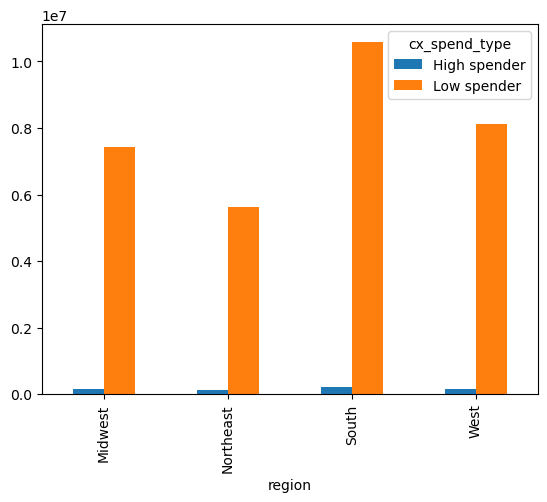

In [24]:
Bar_reg_spend_crosstab = reg_spend_crosstab.plot.bar()

#### Observation: Based on the wikipedia definitions of 'regions' each region has an even proportion of customers with 'High Spender' flags. (excel manipulation, via the to_clipboard() function, shows that 'high-spenders' account for only 2% in each region)
#### The South houses the largest population of InstaCart customers

#### As an additional extra, a crosstab containing the frequency of Loyalty Flags has also been generated to see how a higher level view of customer behaviours also differ region to region.

In [25]:
reg_loyalty_crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['loyalty_flag'], dropna = False)

In [26]:
reg_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


In [27]:
reg_loyalty_crosstab.to_clipboard()

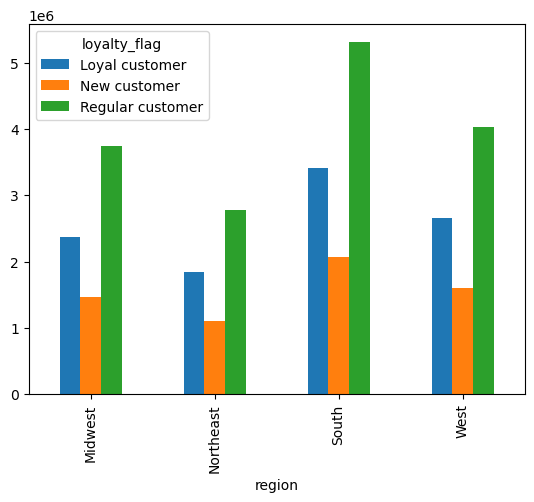

In [28]:
Bar_reg_loyalty_crosstab = reg_loyalty_crosstab.plot.bar()

#### Preliminary review of the crosstab and resulting visualization indicate that size not withstanding, customer behaviour across regions so far seems fairly consistent - After manipulating the crosstab in excel I can confirm that each region had a 31-32% proportion of loyal, or frequent, users

#### d) Generation an exclusionary Flag - we already have a 'max order' column from a prior task which we can leverage for a customers total qty of orders - using a df.loc function we can create a new flag to indicates we need to 'exclude' them from future analysis

In [29]:
#creating a new column with an exclude flag
ords_prods_custs.loc[ords_prods_custs['max_order']<5,'low_activity'] = 'Low Activity'

In [30]:
ords_prods_custs['low_activity'].value_counts(dropna = False)

low_activity
nan             30964564
Low Activity     1440295
Name: count, dtype: int64

In [31]:
#creating a subset of data for the low-activity (la) & Hich-activity (ha) customers:

la_ords_prods_custs = ords_prods_custs[ords_prods_custs['low_activity']=='Low Activity']

In [32]:
la_ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,department,region,low_activity
282,520620,120,prior,1,3,11,NaN,First Order,196,2,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low Activity
283,3273029,120,prior,3,2,8,19.0,Repeat Customer,196,2,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low Activity
284,520620,120,prior,1,3,11,NaN,First Order,46149,1,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low Activity
285,3273029,120,prior,3,2,8,19.0,Repeat Customer,46149,1,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low Activity
286,906054,120,prior,2,4,7,15.0,Repeat Customer,31102,1,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low Activity


In [33]:
#exporting low activity customers so that the marketting/sales team can review the cx base ()
la_ords_prods_custs.to_csv(os.path.join(path,'Prepared Data','la_ords_prods_custs.csv'))

In [34]:
ha_ords_prods_custs = ords_prods_custs[ords_prods_custs['low_activity']=='nan']

In [35]:
ha_ords_prods_custs.shape

(30964564, 35)

In [37]:
#exporting high_activity customers so that work can be continued in the subsequent script
ha_ords_prods_custs.to_pickle(os.path.join(path,'Prepared Data','ha_ords_prods_custs.pkl'))

#### Data of new 'high_activity' (ha) dataframe matches the size of the value_counts output that was calculated above.
#### From now on, we'll be using the high_activity subset as the main file as the CFO indicated that they aren't interested in low-activity customers and want them excluded.
#### Continued in Part 1.2